# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

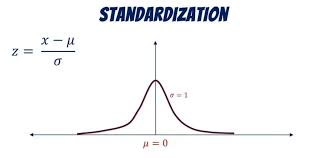


In [5]:
import kagglehub
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("malaiarasugraj/global-health-statistics")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\RAISSA\.cache\kagglehub\datasets\malaiarasugraj\global-health-statistics\versions\1


In [6]:
import os
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
print("Available CSV files:", csv_files)

# Load  dataset
df = pd.read_csv(os.path.join(path, csv_files[0]))
print("Original dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

# Step 2: Handle missing values by dropping them
print("\nMissing values per column:")
print(df.isnull().sum())

# Drop rows with any missing values
df_clean = df.dropna()
print(f"\nDataset shape after dropping missing values: {df_clean.shape}")

# Step 3: Select only numeric columns for PCA
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns
df_numeric = df_clean[numeric_columns]
print(f"\nNumeric columns for PCA: {list(numeric_columns)}")
print(f"Shape of numeric data: {df_numeric.shape}")

data_array = df_numeric.values

# Calculate mean and standard deviation
data_mean = np.mean(data_array, axis=0)
data_std = np.std(data_array, axis=0, ddof=1)

standardized_data = (data_array - data_mean) / data_std

print("\nStandardization completed!")
print("Standardized data shape:", standardized_data.shape)
print("\nFirst 5 rows of standardized data:")
print(standardized_data[:5])

print("\nVerification:")
print("Mean of standardized data (should be ~0):")
print(np.mean(standardized_data, axis=0))
print("\nStandard deviation of standardized data (should be ~1):")
print(np.std(standardized_data, axis=0, ddof=1))

# Create an alias for the cleaned dataset
health_data_clean = df_clean
print(f"\nAlias 'health_data_clean' created for the cleaned dataset with shape: {health_data_clean.shape}")

Available CSV files: ['Global Health Statistics.csv']
Original dataset shape: (1000000, 22)

First few rows:
     Country  Year         Disease Name Disease Category  Prevalence Rate (%)  \
0      Italy  2013              Malaria      Respiratory                 0.95   
1     France  2002                Ebola        Parasitic                12.46   
2     Turkey  2015             COVID-19          Genetic                 0.91   
3  Indonesia  2011  Parkinson's Disease       Autoimmune                 4.68   
4      Italy  2013         Tuberculosis          Genetic                 0.83   

   Incidence Rate (%)  Mortality Rate (%) Age Group Gender  \
0                1.55                8.42      0-18   Male   
1                8.63                8.75       61+   Male   
2                2.35                6.22     36-60   Male   
3                6.29                3.99      0-18  Other   
4               13.59                7.01       61+   Male   

   Population Affected  ...  Ho

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [7]:
# Step 3: Calculate the Covariance Matrix
n_samples = standardized_data.shape[0]
cov_matrix = np.dot(standardized_data.T, standardized_data) / (n_samples - 1)

print("Covariance Matrix:")
print(cov_matrix)
print(f"\nCovariance matrix shape: {cov_matrix.shape}")

Covariance Matrix:
[[ 1.00000000e+00 -8.18146814e-04 -9.43831574e-04  4.47732280e-04
   6.85555639e-04 -1.29107005e-03 -2.69957121e-05 -6.45410979e-04
   1.27541207e-03 -2.73285423e-04  8.16399298e-04 -1.22303608e-03
   2.05597103e-04 -6.09702066e-04  2.01804947e-04]
 [-8.18146814e-04  1.00000000e+00  3.38152327e-04  1.28380365e-03
   6.21521822e-04 -2.30922906e-04  4.18161619e-04  4.68351541e-04
  -1.12815047e-03 -2.01289881e-04  5.35383695e-04  3.68681387e-05
   1.04865358e-03 -1.85132760e-04  2.33371736e-03]
 [-9.43831574e-04  3.38152327e-04  1.00000000e+00  3.23081057e-04
   2.33682182e-03  8.44233680e-04 -3.72094073e-05 -3.39573503e-04
   3.90055912e-04  1.76152962e-04  3.65583883e-04 -1.03136462e-03
   1.18423584e-03 -4.81102575e-04  4.31354273e-04]
 [ 4.47732280e-04  1.28380365e-03  3.23081057e-04  1.00000000e+00
  -1.83059346e-03  7.72026512e-05  8.20286648e-04  7.69349081e-04
  -1.55351894e-03  7.36142248e-04 -1.09511758e-03  1.97414373e-04
  -1.50335631e-03 -1.10255215e-04  1

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [8]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:")
print(eigenvalues)
print(f"\nNumber of eigenvalues: {len(eigenvalues)}")

print("\nEigenvectors:")
print(eigenvectors)
print(f"\nEigenvectors shape: {eigenvectors.shape}")

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print("\nSorted Eigenvalues (descending order):")
print(eigenvalues)
print("\nSorted Eigenvectors (corresponding to sorted eigenvalues):")
print(eigenvectors)

Eigenvalues:
[0.99372264 0.99549535 0.99584893 0.99654958 1.00572007 0.99813485
 0.99895403 0.998861   1.00422898 1.00358339 1.00291236 1.00089882
 1.00126463 1.00179514 1.00203024]

Number of eigenvalues: 15

Eigenvectors:
[[ 2.91465677e-01  3.16370402e-02 -1.09762744e-01  3.99346193e-01
  -8.55693206e-02 -1.03656881e-01 -2.74162276e-01  6.73570186e-02
  -8.75303750e-02 -3.07717985e-01  2.45234209e-01 -2.88352862e-01
   5.10347943e-01  3.71695681e-01 -2.23834274e-02]
 [ 2.63862084e-01 -3.46073600e-01  9.26958180e-02 -1.58136984e-03
   1.67860841e-01 -4.42960968e-01  3.08948366e-01  1.62467931e-01
   1.93174234e-01  4.96506578e-01  5.32038471e-03  6.61128892e-02
   6.55869184e-02  3.86519864e-01  1.17663546e-01]
 [ 3.47231926e-01  7.80240805e-02  2.65297563e-02  1.11875074e-01
  -1.92793204e-01  3.11825285e-01  1.69195201e-01 -5.28616277e-01
   4.30046542e-03  4.81420564e-01  2.01194263e-01 -2.34253569e-01
   1.56193572e-01 -2.57036698e-01  7.31741494e-03]
 [-4.18032963e-01 -7.77370959

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [9]:
# Step 5: Sort Principal Components
sorted_indices = None  # Sort eigenvalues in descending order
sorted_eigenvectors = None  # Sort eigenvectors accordingly
sorted_eigenvectors

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [10]:
# Step 6: Project Data onto Principal Components
num_components = None  # Decide on the number of principal components to keep
reduced_data = None  # Project data onto the principal components
reduced_data[:5]

TypeError: 'NoneType' object is not subscriptable

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [ ]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

In [ ]:
# Step 8: Visualize Before and After PCA


# Plot original data (first two features for simplicity)


# Plot reduced data after PCA
